In [ ]:
!pip install pandas numpy matplotlib

In [ ]:
!pip install -U scikit-learn
!pip install --upgrade tensorflow

In [ ]:
!pip install seaborn

In [218]:
from user_agents import parse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textwrap import wrap

In [ ]:
f=open('../../../Downloads/benign/BlueCoat_Large.webgateway')

In [ ]:
print(f.readline())

In [ ]:
data =[]
for x in f:
    data.append(x)

In [ ]:
f.close()

In [ ]:
benign=pd.DataFrame(data)

In [ ]:
benign.columns=['user_agent']

In [142]:
benign.head()

,user_agent,timestamp,timestamp_obj,min
0,"[02/Aug/2011:22:00:00 -0700] ""user_6"" 0.0.0.0 ...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"
1,"[02/Aug/2011:22:00:00 -0700] ""user_7"" 0.0.0.0 ...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"
2,"[02/Aug/2011:22:00:00 -0700] ""user_8"" 0.0.0.0 ...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"
3,"[02/Aug/2011:22:00:00 -0700] ""user_9"" 0.0.0.0 ...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"
4,"[02/Aug/2011:22:00:00 -0700] ""user_10"" 0.0.0.0...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"


In [143]:
benign.tail()

,user_agent,timestamp,timestamp_obj,min
1424280,"[02/Aug/2011:23:27:37 -0700] ""user_425"" 0.0.0....",02/Aug/2011:23:27:37 -0700,2011-08-02 23:27:37,"(23, 27)"
1424281,"[02/Aug/2011:23:27:37 -0700] ""user_426"" 0.0.0....",02/Aug/2011:23:27:37 -0700,2011-08-02 23:27:37,"(23, 27)"
1424282,"[02/Aug/2011:23:27:37 -0700] ""user_427"" 0.0.0....",02/Aug/2011:23:27:37 -0700,2011-08-02 23:27:37,"(23, 27)"
1424283,"[02/Aug/2011:23:27:37 -0700] ""user_428"" 0.0.0....",02/Aug/2011:23:27:37 -0700,2011-08-02 23:27:37,"(23, 27)"
1424284,"[02/Aug/2011:23:27:37 -0700] ""user_429"" 0.0.0....",02/Aug/2011:23:27:37 -0700,2011-08-02 23:27:37,"(23, 27)"


In [144]:
a=parse(benign['user_agent'][3])

In [145]:
str(a)

'PC / Windows 7 / IE 9.0'

In [146]:
a.browser.family

'IE'

In [147]:
a.ua_string

'[02/Aug/2011:22:00:00 -0700] "user_9" 0.0.0.0 0.0.0.0  9080 302 TCP_NC_MISS "GET http://gamezer.com/billiards//imp HTTP/1.0" "unknown"  "low risk" "-" 511 375 "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0)" "ad.yieldmanager.com" "-" "0" "" "-"\n'

In [107]:
benign['timestamp_obj']=benign['timestamp'].apply(lambda x:pd.to_datetime(x,format='%d/%b/%Y:%H:%M:%S -0700',errors='coerce'))

In [106]:
benign['timestamp']=benign['user_agent'].apply(lambda x: re.findall(r'^\[(.+?)\]',x)[0])

In [108]:
benign.isnull().sum()

user_agent       0
timestamp        0
timestamp_obj    0
dtype: int64

In [110]:
benign['timestamp_obj'].max(),benign['timestamp_obj'].min()

(Timestamp('2011-08-02 23:27:37'), Timestamp('2011-08-02 22:00:00'))

In [126]:
benign['min']=benign['timestamp_obj'].apply(lambda x:(x.hour,x.minute))

In [128]:
benign.head()

,user_agent,timestamp,timestamp_obj,min
0,"[02/Aug/2011:22:00:00 -0700] ""user_6"" 0.0.0.0 ...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"
1,"[02/Aug/2011:22:00:00 -0700] ""user_7"" 0.0.0.0 ...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"
2,"[02/Aug/2011:22:00:00 -0700] ""user_8"" 0.0.0.0 ...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"
3,"[02/Aug/2011:22:00:00 -0700] ""user_9"" 0.0.0.0 ...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"
4,"[02/Aug/2011:22:00:00 -0700] ""user_10"" 0.0.0.0...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"


In [152]:
grouped_benign=benign.groupby('min', group_keys=False)

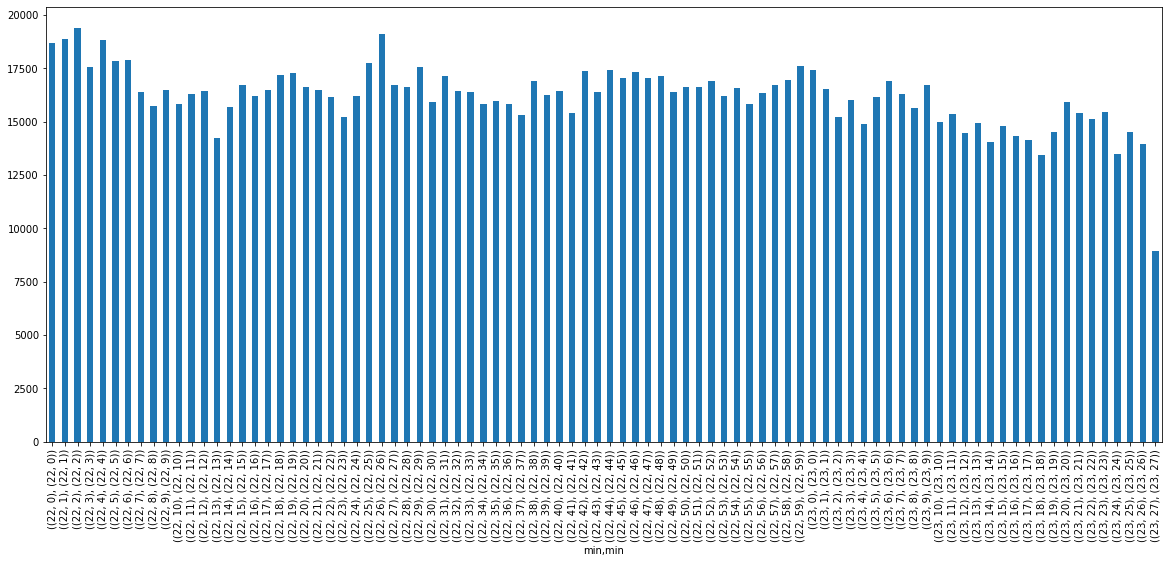

In [190]:
plt.figure(figsize=(20,8))
grouped_benign['min'].value_counts().plot(kind='bar')

In [167]:
sample=grouped_benign.apply(lambda x: x.sample(frac=0.005)).reset_index()

In [168]:
sample

,index,user_agent,timestamp,timestamp_obj,min
0,7592,"[02/Aug/2011:22:00:25 -0700] ""user_98"" 0.0.0.0...",02/Aug/2011:22:00:25 -0700,2011-08-02 22:00:25,"(22, 0)"
1,1424,"[02/Aug/2011:22:00:05 -0700] ""user_430"" 0.0.0....",02/Aug/2011:22:00:05 -0700,2011-08-02 22:00:05,"(22, 0)"
2,4280,"[02/Aug/2011:22:00:15 -0700] ""user_286"" 0.0.0....",02/Aug/2011:22:00:15 -0700,2011-08-02 22:00:15,"(22, 0)"
3,2921,"[02/Aug/2011:22:00:10 -0700] ""user_427"" 0.0.0....",02/Aug/2011:22:00:10 -0700,2011-08-02 22:00:10,"(22, 0)"
4,14599,"[02/Aug/2011:22:00:46 -0700] ""user_105"" 0.0.0....",02/Aug/2011:22:00:46 -0700,2011-08-02 22:00:46,"(22, 0)"
...,...,...,...,...,...
7116,1417805,"[02/Aug/2011:23:27:09 -0700] ""user_450"" 0.0.0....",02/Aug/2011:23:27:09 -0700,2011-08-02 23:27:09,"(23, 27)"
7117,1416181,"[02/Aug/2011:23:27:03 -0700] ""user_326"" 0.0.0....",02/Aug/2011:23:27:03 -0700,2011-08-02 23:27:03,"(23, 27)"
7118,1416979,"[02/Aug/2011:23:27:05 -0700] ""user_124"" 0.0.0....",02/Aug/2011:23:27:05 -0700,2011-08-02 23:27:05,"(23, 27)"
7119,1424026,"[02/Aug/2011:23:27:36 -0700] ""user_171"" 0.0.0....",02/Aug/2011:23:27:36 -0700,2011-08-02 23:27:36,"(23, 27)"


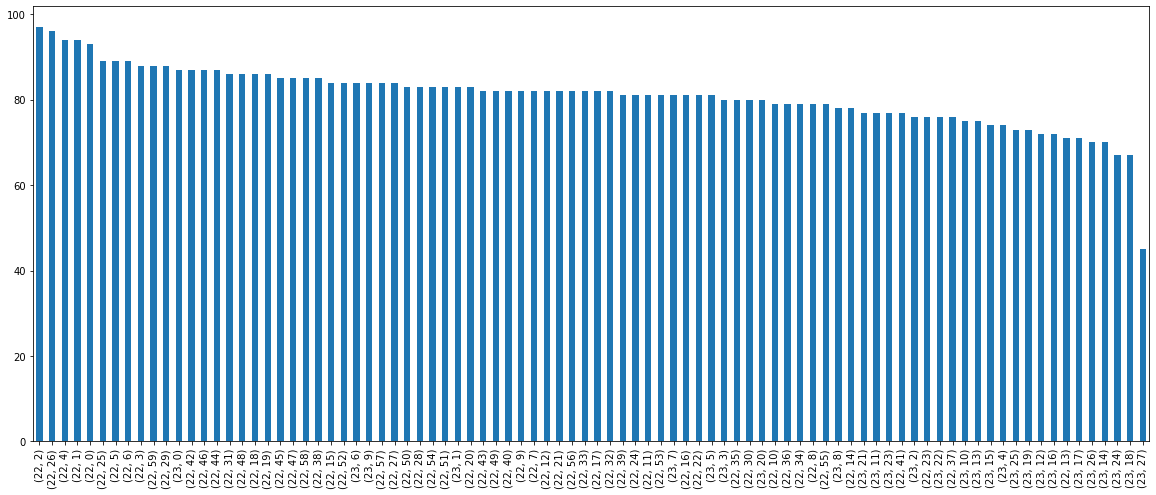

In [191]:
plt.figure(figsize=(20,8))
sample['min'].value_counts().plot(kind='bar')

In [169]:
sample['browser_family']=sample['user_agent'].apply(lambda x:parse(x).browser.family)

In [170]:
sample['browser_version']=sample['user_agent'].apply(lambda x:parse(x).browser.version_string)

In [171]:
sample['os_family']=sample['user_agent'].apply(lambda x:parse(x).os.family)

In [172]:
sample['os_version']=sample['user_agent'].apply(lambda x:parse(x).os.version_string)

In [173]:
sample['device_family']=sample['user_agent'].apply(lambda x:parse(x).device.family)

In [174]:
sample['device_brand']=sample['user_agent'].apply(lambda x:parse(x).device.brand)

In [175]:
sample['device_model']=sample['user_agent'].apply(lambda x:parse(x).device.model)

In [176]:
sample['is_mobile']=sample['user_agent'].apply(lambda x:parse(x).is_mobile)

In [177]:
sample['is_tablet']=sample['user_agent'].apply(lambda x:parse(x).is_tablet)

In [178]:
sample['is_pc']=sample['user_agent'].apply(lambda x:parse(x).is_pc)

In [179]:
sample['is_touch_capable']=sample['user_agent'].apply(lambda x:parse(x).is_touch_capable)

In [180]:
sample['is_bot']=sample['user_agent'].apply(lambda x:parse(x).is_bot)

In [198]:
sample=pd.DataFrame(sample)

In [319]:
sample

,index,user_agent,timestamp,timestamp_obj,min,browser_family,browser_version,os_family,os_version,device_family,device_brand,device_model,is_mobile,is_tablet,is_pc,is_touch_capable,is_bot
0,7592,"[02/Aug/2011:22:00:25 -0700] ""user_98"" 0.0.0.0...",02/Aug/2011:22:00:25 -0700,2011-08-02 22:00:25,"(22, 0)",IE,8.0,Windows,7,Other,None,None,False,False,True,False,False
1,1424,"[02/Aug/2011:22:00:05 -0700] ""user_430"" 0.0.0....",02/Aug/2011:22:00:05 -0700,2011-08-02 22:00:05,"(22, 0)",IE,6.0,Windows,XP,Other,None,None,False,False,True,False,False
2,4280,"[02/Aug/2011:22:00:15 -0700] ""user_286"" 0.0.0....",02/Aug/2011:22:00:15 -0700,2011-08-02 22:00:15,"(22, 0)",IE,9.0,Windows,7,Other,None,None,False,False,True,False,False
3,2921,"[02/Aug/2011:22:00:10 -0700] ""user_427"" 0.0.0....",02/Aug/2011:22:00:10 -0700,2011-08-02 22:00:10,"(22, 0)",IE,8.0,Windows,7,Other,None,None,False,False,True,False,False
4,14599,"[02/Aug/2011:22:00:46 -0700] ""user_105"" 0.0.0....",02/Aug/2011:22:00:46 -0700,2011-08-02 22:00:46,"(22, 0)",Firefox,3.6.18,Windows,XP,Other,None,None,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,1417805,"[02/Aug/2011:23:27:09 -0700] ""user_450"" 0.0.0....",02/Aug/2011:23:27:09 -0700,2011-08-02 23:27:09,"(23, 27)",Firefox,5.0,Windows,7,Other,None,None,False,False,True,False,False
7117,1416181,"[02/Aug/2011:23:27:03 -0700] ""user_326"" 0.0.0....",02/Aug/2011:23:27:03 -0700,2011-08-02 23:27:03,"(23, 27)",Chrome,12.0.742,Windows,7,Other,None,None,False,False,True,False,False
7118,1416979,"[02/Aug/2011:23:27:05 -0700] ""user_124"" 0.0.0....",02/Aug/2011:23:27:05 -0700,2011-08-02 23:27:05,"(23, 27)",IE,8.0,Windows,7,Other,None,None,False,False,True,False,False
7119,1424026,"[02/Aug/2011:23:27:36 -0700] ""user_171"" 0.0.0....",02/Aug/2011:23:27:36 -0700,2011-08-02 23:27:36,"(23, 27)",Chrome,12.0.742,Windows,7,Other,None,None,False,False,True,False,False


In [199]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7121 entries, 0 to 7120
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             7121 non-null   int64         
 1   user_agent        7121 non-null   object        
 2   timestamp         7121 non-null   object        
 3   timestamp_obj     7121 non-null   datetime64[ns]
 4   min               7121 non-null   object        
 5   browser_family    7121 non-null   object        
 6   browser_version   7121 non-null   object        
 7   os_family         7121 non-null   object        
 8   os_version        7121 non-null   object        
 9   device_family     7121 non-null   object        
 10  device_brand      588 non-null    object        
 11  device_model      588 non-null    object        
 12  is_mobile         7121 non-null   bool          
 13  is_tablet         7121 non-null   bool          
 14  is_pc             7121 n

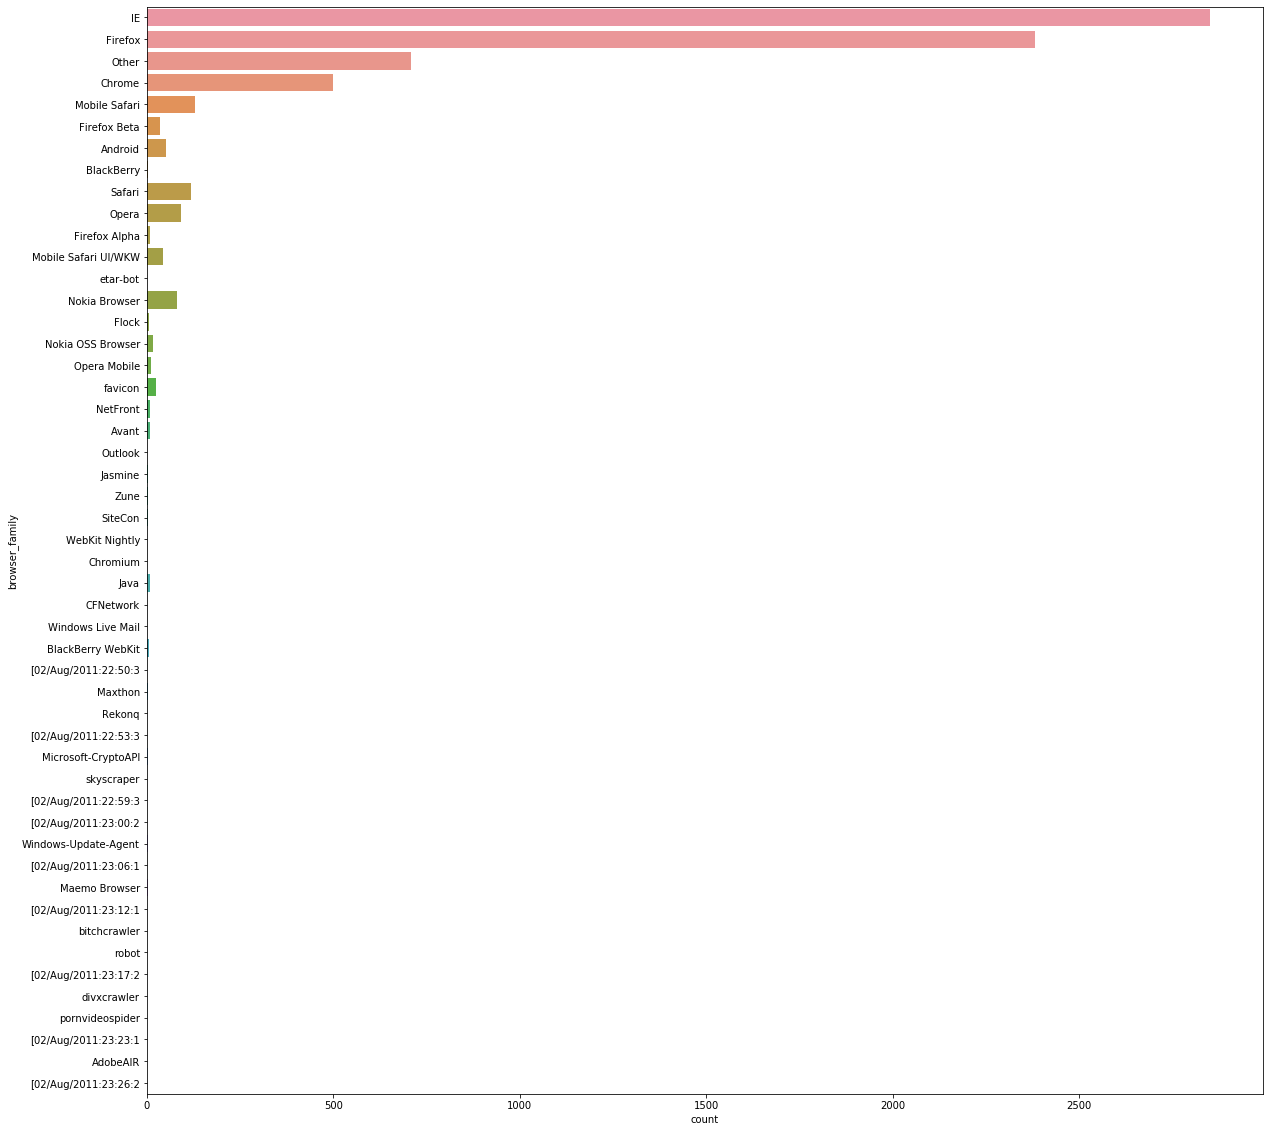

In [305]:
plt.figure(figsize=(20,20))
ax=sns.countplot(y='browser_family',data=sample)
#labels=['\n'.join(wrap(l.get_text(),20)) for l in ax.get_yticklabels()]
labels=[l.get_text()[:20] for l in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.show()

In [215]:
browser_cnt=pd.DataFrame(sample['browser_family'].value_counts()).reset_index()
browser_cnt.columns=['browser_family','counts']
browser_cnt

,browser_family,counts
0,IE,2850
1,Firefox,2382
2,Other,707
3,Chrome,500
4,Mobile Safari,130
5,Safari,119
6,Opera,90
7,Nokia Browser,80
8,Android,51
9,Mobile Safari UI/WKWebView,43


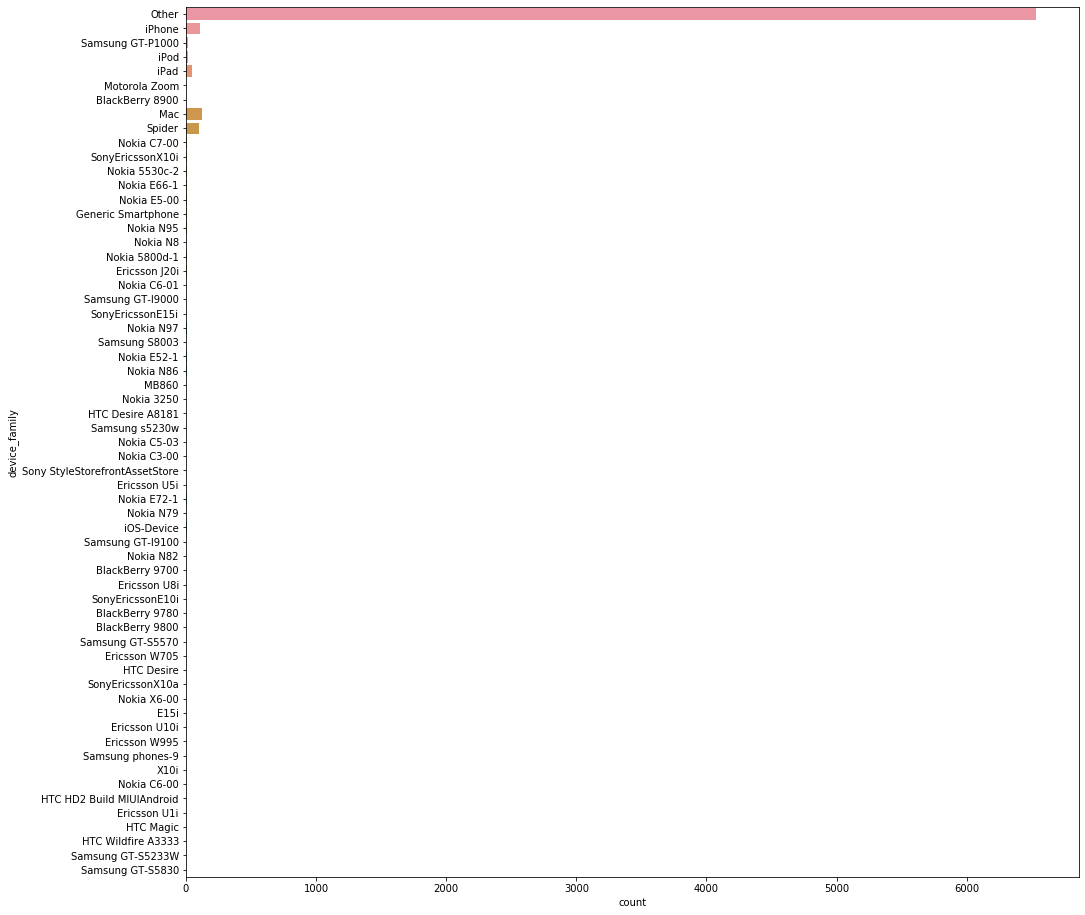

In [347]:
plt.figure(figsize=(16,16))
ax=sns.countplot(y='device_family', data=sample)

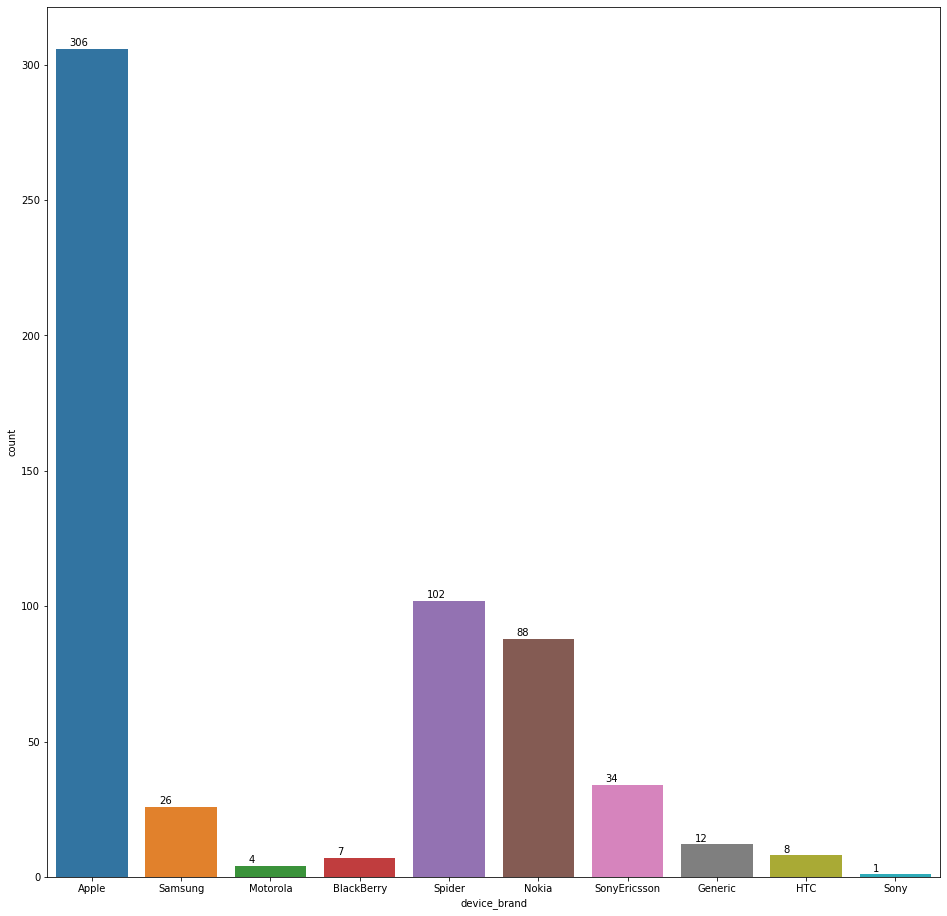

In [350]:
plt.figure(figsize=(16,16))
ax=sns.countplot(x='device_brand', data=sample)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()


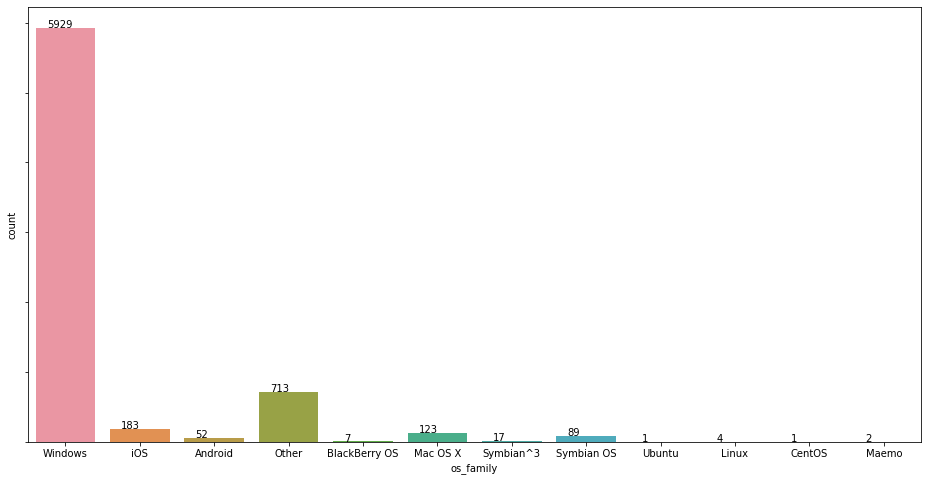

In [326]:
plt.figure(figsize=(16,8))
ax=sns.countplot(x='os_family',data=sample)
#labels=['\n'.join(wrap(l.get_text(),20)) for l in ax.get_yticklabels()]
labels=[l.get_text()[:20] for l in ax.get_yticklabels()]
ax.set_yticklabels(labels)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

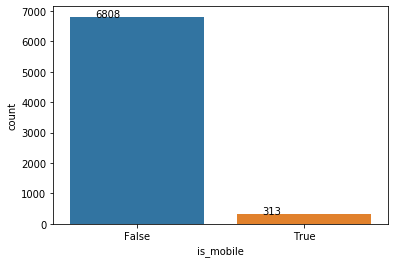

In [316]:
ax=sns.countplot(sample['is_mobile'])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

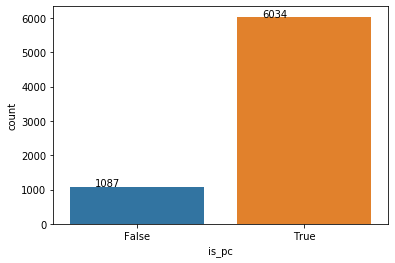

In [301]:
ax=sns.countplot(sample['is_pc'])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

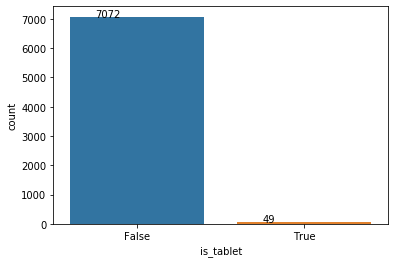

In [299]:
ax=sns.countplot(sample['is_tablet'])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

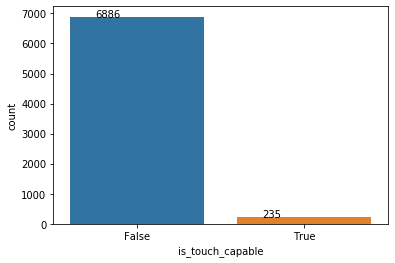

In [308]:
ax=sns.countplot(sample['is_touch_capable'])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

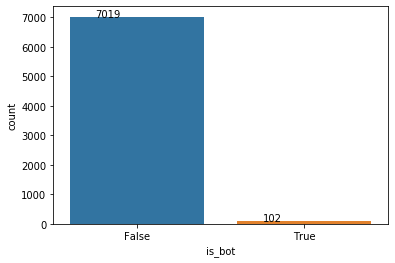

In [318]:
ax=sns.countplot(sample['is_bot'])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

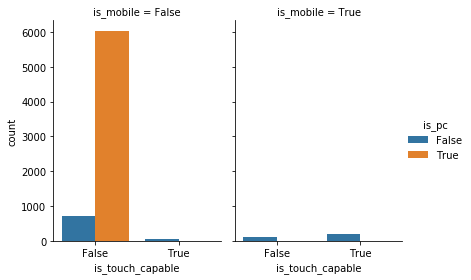

In [314]:
sns.catplot(x="is_touch_capable", hue="is_pc", col="is_mobile",
...                 data=sample, kind="count",
...                 height=4, aspect=.7);


In [372]:
sample_cln=sample.drop(['index','user_agent','timestamp','timestamp_obj','min','os_version','browser_version','device_family','device_brand','device_model'],axis=1)

In [373]:
sample_cln=pd.concat([sample_cln,pd.get_dummies(sample_cln['os_family'])],axis=1).drop(['os_family'],axis=1)
sample_cln=pd.concat([sample_cln,pd.get_dummies(sample_cln['browser_family'])],axis=1).drop(['browser_family'],axis=1)
#sample_cln=pd.concat([sample_cln,pd.get_dummies(sample_cln['is_mobile'],drop_first=True)],axis=1).drop(['is_mobile'],axis=1)